In [44]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

Importing Dataset

In [45]:
from keras.datasets import fashion_mnist
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, 

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [47]:
## converting 3D array to 2D array 
X_train = X_train/255
X_test = X_test/255
X2d_train = X_train.reshape(60000,-1)
X2d_test = X_test.reshape(10000,-1)

In [48]:
X2d_train.shape, X2d_test.shape, y_train.shape, y_test.shape, 

((60000, 784), (10000, 784), (60000,), (10000,))

Logistic Regression for the whole data

In [50]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", 
                             random_state=42)
log_reg.fit(X2d_train, y_train)
log_reg.score(X2d_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8416

In [51]:
clusters = [50, 100, 150, 200, 250, 300]
score = []
for i in clusters:
  kmeans = KMeans(n_clusters=i, random_state=42)
  X_image_dist = kmeans.fit_transform(X2d_train)
  representative_image = np.argmin(X_image_dist, axis=0)
  X_representative_image = X_train[representative_image]
  y_representative_image = y_train[representative_image][:]
  X_representative_image = X_representative_image.reshape(i,784)
  log_reg = LogisticRegression(multi_class="ovr", solver="saga", 
                               max_iter=5000, random_state=42)
  log_reg.fit(X_representative_image, y_representative_image)
  scorei = log_reg.score(X2d_test, y_test)
  print(i,scorei)
  score.append(scorei) 

50 0.6213
100 0.7218
150 0.7424
200 0.7578
250 0.7615
300 0.7632


Visualzing Score vs number of clusters graph For (50, 100, 150, 200, 250, 300)

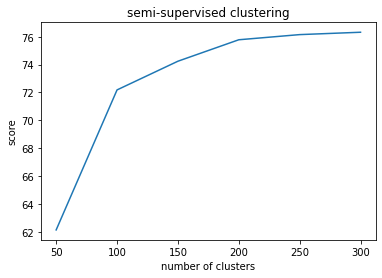

In [56]:
x = clusters
y = [i*100 for i in score]
plt.plot(x,y)
plt.xlabel("number of clusters")
plt.ylabel("score")
plt.title("semi-supervised clustering")
plt.show()

Because from 200 the score converges we take finer margin for number of cluster

In [57]:
clusters1 = [170,180,190,200,210,220,230]
score1 = []
for i in clusters1:
  kmeans = KMeans(n_clusters=i, random_state=42)
  X_image_dist = kmeans.fit_transform(X2d_train)
  representative_image = np.argmin(X_image_dist, axis=0)
  X_representative_image = X_train[representative_image]
  y_representative_image = y_train[representative_image][:]
  X_representative_image = X_representative_image.reshape(i,784)
  log_reg = LogisticRegression(multi_class="ovr", solver="saga", 
                               max_iter=5000, random_state=42)
  log_reg.fit(X_representative_image, y_representative_image)
  scorei = log_reg.score(X2d_test, y_test)
  print(i,scorei)
  score1.append(scorei)

170 0.7493
180 0.7486
190 0.7605
200 0.7578
210 0.7655
220 0.7709
230 0.7638


In [60]:
score1 = [i*100 for i in score1]
new_clusters = clusters[:3]+clusters1+clusters[4:]
new_scores = score[:3] + score1+score[4:]

Visualizing for finer number of cluster

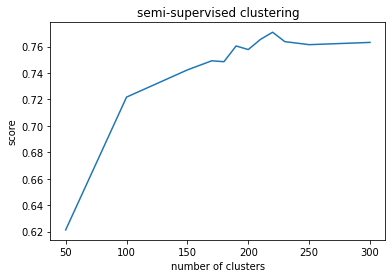

In [61]:
plt.plot(new_clusters, new_scores)
plt.xlabel("number of clusters")
plt.ylabel("score")
plt.title("semi-supervised clustering")
plt.show()

Choose suitable value of K as number of cluster and propaggate through whole. As we observe score is the maximum near 220 so we choose 220 as our no. of clusters.

In [69]:
k = 220

In [71]:
kmeans = KMeans(n_clusters=k, random_state=42)
X_image_dist = kmeans.fit_transform(X2d_train)
representative_image = np.argmin(X_image_dist, axis=0)
X_representative_image = X_train[representative_image]
y_representative_image = y_train[representative_image][:]
X_representative_image = X_representative_image.reshape(k,784)
y_train_propagated = np.empty(len(X2d_train),dtype = np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_image[i]

In [ ]:
log_reg = LogisticRegression(multi_class="auto", solver="sag", max_iter=10000, random_state=42)
log_reg.fit(X2d_train, y_train_propagated)
log_reg.score(X2d_test, y_test)

In [ ]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X2d_train)), kmeans.labels_]
for i in range(k):
  in_cluster = (kmeans.labels_ == i)
  cluster_dist = X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(cluster_dist, percentile_closest)
  above_cutoff = (X_cluster_dist > cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff] = -1
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="sag", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X2d_test, Y_test)

## This does not improve accuracy significantly. Hence we choose the propegate through the entire cluster for the 220 clusters. 